## Applied - Question 11

This question will explain the backfitting process using by GAMs.

#### Import block

In [63]:
import numpy as np
import pandas as pd
import scipy as sp
from itertools import combinations

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score, train_test_split
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.decomposition import PCA

import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-white')

#### (a) Generate X1, X2, y with n=100

In [64]:
# Set seed
np.random.seed(1)

# Generate using normal
x1 = np.random.normal(0, 1, size=100)
x2 = np.random.normal(0, 1, size=100)
eps = np.random.normal(0, 0.1, size=100)

# get y
y = 2.9 + 3.7*x1 - 1.2*x2 + eps

#### (b), (c), and (d) The loop

Keep b1 fixed we get b2. After that, using b2 we get b1. Repeat until convergence.

The plots shows almost instant  convergence after a first few loop.


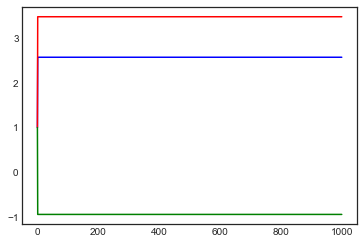

In [65]:
# Choose random b1
b1 = 1
b2 = 1
i = 1

# List for plot
b0_list = [1]
b1_list = [1]
b2_list = [1]

while i < 1001:
    # Keep b1 fixed, we calculate b2
    a = y - b1*x1
    regr = sm.OLS(a, sm.add_constant(x2)).fit()
    b2_list.append(regr.params[1])
    
    # Keep b1 fixed, we calculate b2
    a = y - b2*x2
    regr = sm.OLS(a, sm.add_constant(x1)).fit()
    b1_list.append(regr.params[1])
    
    # Update b0
    b0_list.append(regr.params[0])
    
    # update i
    i += 1

# Plot
plt.plot(range(0,1001), b0_list, color='b')
plt.plot(range(0,1001), b1_list, color='r')
plt.plot(range(0,1001), b2_list, color='g')

#### (f) Using multiple linear regression

d:\pycharmprojects\islr\venv\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


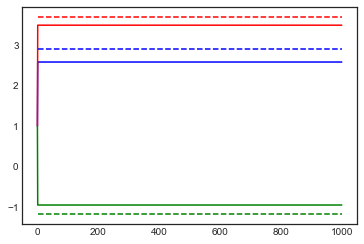

In [66]:
# Get x data
x = pd.DataFrame({'x1':x1, 'x2':x2})

# Multiple linear regression
regr = sm.OLS(y, sm.add_constant(x)).fit()

# Convergence plot
plt.plot(range(0,1001), b0_list, color='b')
plt.plot(range(0,1001), b1_list, color='r')
plt.plot(range(0,1001), b2_list, color='g')

# reg plot
plt.plot(range(1,1001), np.repeat(regr.params[0], 1000), color='b', linestyle='--')
plt.plot(range(1,1001), np.repeat(regr.params[1], 1000), color='r', linestyle='--')
plt.plot(range(1,1001), np.repeat(regr.params[2], 1000), color='g', linestyle='--')

#### (g) Backfitting steps

We only need to perform backfitting once to get an extremely good approximation of 
X and y in this example. This is because of the linear relationship between the two.

## Question 12 

Lets p=100. First lets simulate the variables. The code takes a while to run. Nevertheless,
backfitting quickly get to the convergence point within 2-3 runs.

## WILL REVISIT THE CODE!

In [69]:
# Random x, y, eps
p = 100
n = 1000
X = np.random.randn(n, p)
B = np.random.rand(p)
eps = np.random.rand(n)

# Naming X
name = []
for i in range(1, 101):
    name.append(f'X_{i}')

# Create y
y = 2.5 + np.dot(X, B) + eps

ValueError: x and y must have same first dimension, but have shapes (11,) and (9,)

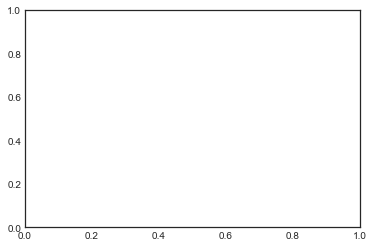

In [119]:
# Parameters
k = 1
MSE = []

# Loop
while k < 10:
    beta = [0]
    for i in range(1, p):
        a = y - np.dot(X, B) + np.dot(X[:,i], B[i])
        regr = sm.OLS(a, sm.add_constant(np.delete(X, i, axis=1))).fit()
        beta.append(regr.params[1])
        
    beta[0] = regr.params[0]
    y_pred = np.dot(X, beta)
    MSE.append(mean_squared_error(y, y_pred))
    
    # update i
    k += 1

plt.plot(range(0,9), MSE)